In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
data = pd.read_csv('https://gist.githubusercontent.com/simonlast/d20a53af004bfd7cd912403884ce80d2/raw/c92846e3387f11abc7e318db88c7aca6ecec1b4c/height_weight_data.csv')
data

,Index,Height (Inches),Weight (Pounds)
0,1,65.78,112.99
1,2,71.52,136.49
2,3,69.40,153.03
3,4,68.22,142.34
4,5,67.79,144.30
...,...,...,...
195,196,65.80,120.84
196,197,66.11,115.78
197,198,68.24,128.30
198,199,68.02,127.47


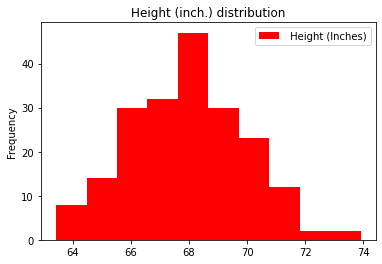

In [17]:
data.plot(y=' Height (Inches)',kind = 'hist',color = 'red',title='Height (inch.) distribution');

In [11]:
data.columns

Index(['Index', ' Height (Inches)', ' Weight (Pounds)'], dtype='object')

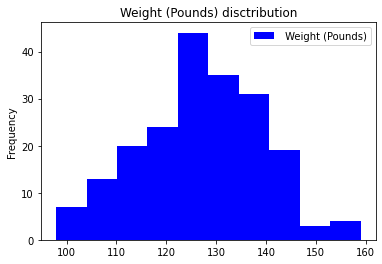

In [16]:
data.plot(y=' Weight (Pounds)',kind='hist' ,color='blue',title = 'Weight (Pounds) disctribution');

In [20]:
data.drop('Index',axis=1,inplace=True)

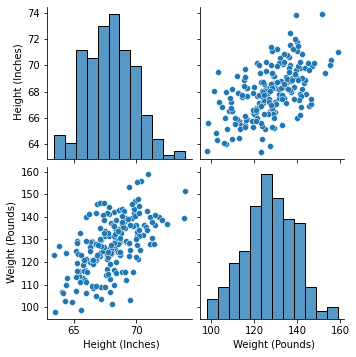

In [22]:
sns.pairplot(data);

In [23]:
def make_bmi(height_inch, weight_pound):
    METER_TO_INCH, KILO_TO_POUND = 39.37, 2.20462
    return (weight_pound / KILO_TO_POUND) / (height_inch / METER_TO_INCH) ** 2

In [25]:
data['BMI'] = data.apply(lambda row: make_bmi(row[' Weight (Pounds)'], row[' Height (Inches)']),axis=1)
data

,Height (Inches),Weight (Pounds),BMI
0,65.78,112.99,3.622521
1,71.52,136.49,2.699125
2,69.40,153.03,2.083547
3,68.22,142.34,2.367309
4,67.79,144.30,2.288917
...,...,...,...
195,65.80,120.84,3.168119
196,66.11,115.78,3.467346
197,68.24,128.30,2.914626
198,68.02,127.47,2.943186


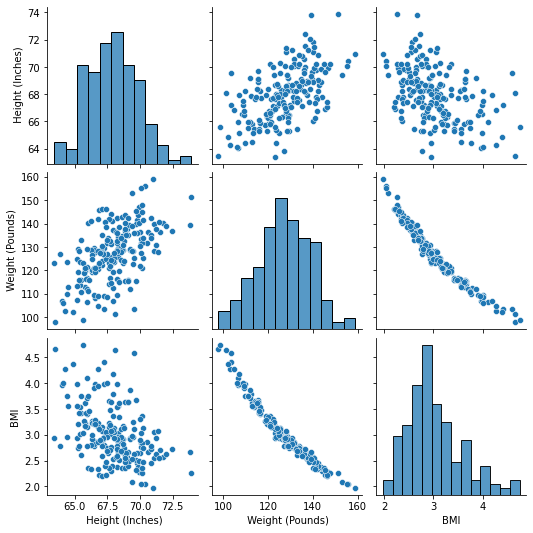

In [27]:
sns.pairplot(data);

In [32]:
def weight_categore(weight):
    if weight<120 : return 1
    if weight>=150 : return 3
    if (weight>=120)&(weight<150) : return 2

data['weight_cat'] = data[' Weight (Pounds)'].apply(weight_categore)

In [33]:
data

,Height (Inches),Weight (Pounds),BMI,weight_cat
0,65.78,112.99,3.622521,1
1,71.52,136.49,2.699125,2
2,69.40,153.03,2.083547,3
3,68.22,142.34,2.367309,2
4,67.79,144.30,2.288917,2
...,...,...,...,...
195,65.80,120.84,3.168119,2
196,66.11,115.78,3.467346,1
197,68.24,128.30,2.914626,2
198,68.02,127.47,2.943186,2


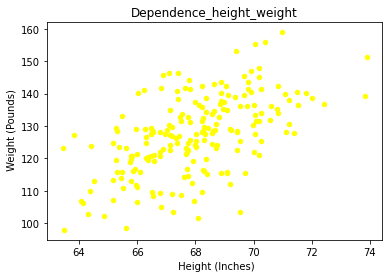

In [37]:
data.plot(y = ' Weight (Pounds)', x = ' Height (Inches)', kind = 'scatter', color = 'yellow',
          title = 'Dependence_height_weight' );

In [72]:
x = data[' Weight (Pounds)']
y = data[' Height (Inches)']  

In [84]:
def error(w0, w1):
    s=0. 
    for i in range(1,data.shape[0]):
     s+=(y[i]-w0-w1*x[i])**2
    return s

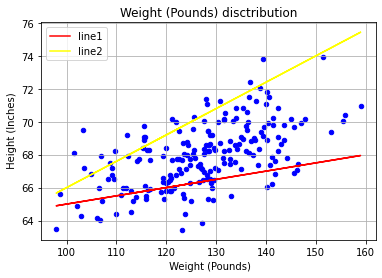

In [63]:
w0 , w1 = 60 , 0.05
y1 = [w0 + w1*t for t in x]

w0 , w1 = 50 , 0.16
y2 = [w0 + w1*t for t in x]

data.plot(x=' Weight (Pounds)',y = ' Height (Inches)', kind='scatter' ,color='blue',title = 'Weight (Pounds) disctribution');
plt.plot(x,y1, color = 'red', label = 'line1');
plt.plot(x,y2, color = 'yellow', label = 'line2');
plt.grid(True)
plt.legend(loc='upper left');

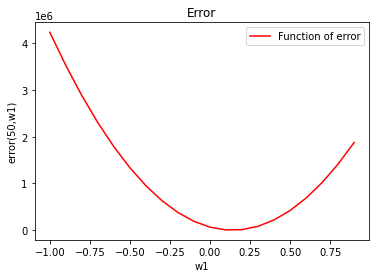

In [100]:
w0 , w1 = 50, np.arange(-1,1,0.1)
err = [error(w0,w1) for w1 in w1]
plt.title('Error')
plt.xlabel('w1')
plt.ylabel('error(50,w1)')

plt.plot(w1, err, color = 'red', label = 'Function of error');
plt.legend();

In [94]:
from scipy.optimize import minimize_scalar

In [97]:
def error50(w1):
    return error(50,w1)

min = minimize_scalar(error50, bounds=(-5,5) , method='bounded')
w1_opt = min.x
min.x , min.fun 

(0.14065183865815456, 589.5827524316306)

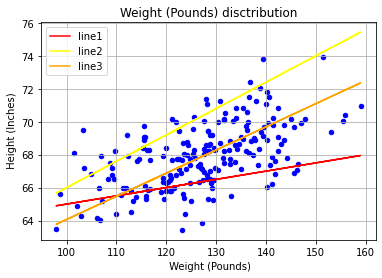

In [98]:
w0 , w1 = 60 , 0.05
y1 = [w0 + w1*t for t in x]

w0 , w1 = 50 , 0.16
y2 = [w0 + w1*t for t in x]

w0 , w1_opt = 50 , w1_opt
y3 = [w0 + w1_opt*t for t in x]

data.plot(x=' Weight (Pounds)',y = ' Height (Inches)', kind='scatter' ,color='blue',title = 'Weight (Pounds) disctribution');
plt.plot(x,y1, color = 'red', label = 'line1');
plt.plot(x,y2, color = 'yellow', label = 'line2');
plt.plot(x,y3, color = 'orange', label = 'line3');
plt.grid(True)
plt.legend(loc='upper left');

In [101]:
from mpl_toolkits.mplot3d import Axes3D

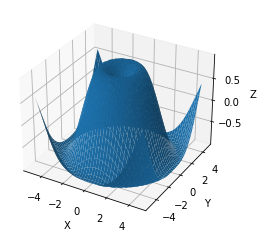

In [102]:
fig = plt.figure()
ax = fig.gca(projection="3d")  # get current axis

# Создаем массивы NumPy с координатами точек по осям X и У.
# Используем метод meshgrid, при котором по векторам координат
# создается матрица координат. Задаем нужную функцию Z(x, y).
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
Z = np.sin(np.sqrt(X ** 2 + Y ** 2))

# Наконец, используем метод *plot_surface* объекта
# типа Axes3DSubplot. Также подписываем оси.
surf = ax.plot_surface(X, Y, Z)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.show()

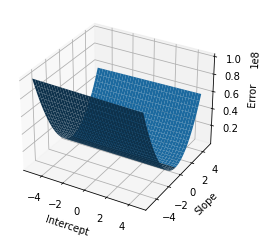

In [103]:
fig = plt.figure()
ax = fig.gca(projection="3d") 

w0 = np.arange(-5, 5, 0.25)
w1 = np.arange(-5, 5, 0.25)
W0, W1 = np.meshgrid(w0,w1)
E = error(W0,W1)

surf = ax.plot_surface(W0, W1, E)
ax.set_xlabel("Intercept")
ax.set_ylabel("Slope")
ax.set_zlabel("Error")
plt.show()

In [104]:
from scipy.optimize import minimize

In [111]:
def error1(w):
    s=0.
    for i in range(1,len(data.index)):
     s+=(y[i]-w[0]-w[1]*x[i])**2
    return s

min = minimize(error1, np.array([0,0]), method='L-BFGS-B', bounds=((-100,100),(-5,5)))
min.x , min.fun

(array([56.51838743,  0.08988926]), 516.1081723253074, 56.51838743232329)

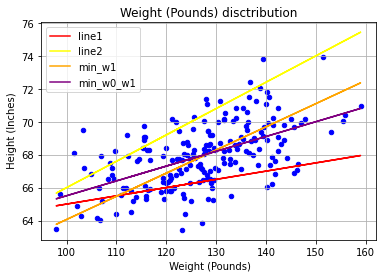

In [114]:
w0 , w1 = 60 , 0.05
y1 = [w0 + w1*t for t in x]

w0 , w1 = 50 , 0.16
y2 = [w0 + w1*t for t in x]

w0 , w1_opt = 50 , w1_opt
y3 = [w0 + w1_opt*t for t in x]

w0 , w1 = min.x[0] , min.x[1]
y4 = [w0+w1*t for t in x]

data.plot(x=' Weight (Pounds)',y = ' Height (Inches)', kind='scatter' ,color='blue',title = 'Weight (Pounds) disctribution');
plt.plot(x,y1, color = 'red', label = 'line1');
plt.plot(x,y2, color = 'yellow', label = 'line2');
plt.plot(x,y3, color = 'orange', label = 'min_w1');
plt.plot(x,y4, color = 'purple', label = 'min_w0_w1');
plt.grid(True)
plt.legend(loc='upper left');